In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Cargamos los datos

In [2]:
test = pd.read_csv('data/test/test.csv')
test.shape

(3972, 23)

In [3]:
train = pd.read_csv('data/train/train.csv')
train.shape

(14993, 24)

In [4]:
set(train.columns) ^ set(test.columns) # ^ es diferencia simetrica

{'AdoptionSpeed'}

##### Observamos que State es un numero, por ello cargaremos luego la tabla<br>de equivalencias para State para facilitar legibilidad


In [5]:
test.State.value_counts()

41326    1833
41401    1072
41327     510
41330     147
41336     127
41332     101
41324      73
41325      63
41335      17
41367       7
41345       7
41342       5
41415       4
41361       3
41380       3
Name: State, dtype: int64

In [6]:
train.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

##### Cargamos tabla de equivalencias de estados y la agregamos a train y test

In [7]:
df_state = pd.read_csv('data/state_labels.csv')
df_state.rename(columns={"StateID":"State"}, inplace=True)
df_state

,State,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [8]:
train = pd.merge(train, df_state)
test = pd.merge(test, df_state)

### Quantity
Eventualmente nos encontramos con varias mascotas en un solo anuncio

In [9]:
df_quantcum = pd.DataFrame(train.Quantity.value_counts())
df_quantcum.rename(columns={'Quantity':'Freq'}, inplace=True)
df_quantcum['CumulativeFreq'] = df_quantcum.Freq.cumsum()
df_quantcum['RelFreq'] = df_quantcum.Freq / df_quantcum.Freq.sum()
df_quantcum['CumulativeRelFreq'] = df_quantcum.RelFreq.cumsum()
df_quantcum

,Freq,CumulativeFreq,RelFreq,CumulativeRelFreq
1,11565,11565,0.771360,0.771360
2,1422,12987,0.094844,0.866204
3,726,13713,0.048423,0.914627
4,531,14244,0.035417,0.950043
5,333,14577,0.022210,0.972254
6,185,14762,0.012339,0.984593
7,84,14846,0.005603,0.990195
8,52,14898,0.003468,0.993664
9,33,14931,0.002201,0.995865
10,19,14950,0.001267,0.997132


In [10]:
1 - 0.995865 #anuncios con 10 mascotas o mas

0.004135

Text(0.5, 1.0, 'Presencia de anuncios por cantidad de mascotas ofrecidas')

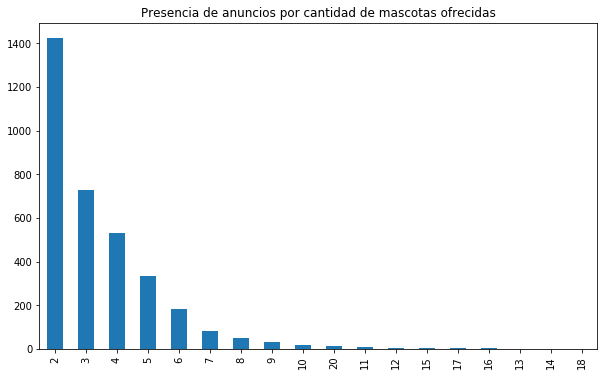

In [11]:
#ax = df_quantcum[df_quantcum.Freq > 100]['Freq'].plot.pie()

ax = df_quantcum['Freq'].iloc[1:].plot.bar(figsize=(10, 6))
ax.set_title("Presencia de anuncios por cantidad de mascotas ofrecidas")

In [100]:
#se observa que el grupo mayoritario es el de anuncios con 1 mascota
#luego separaremos en dos grupos menores: anuncios con 2 o 3 mascotas y
#                                         anuncios con 4 o mas mascotas

In [12]:
def assign_group_quantity(original_quantity):
    if original_quantity <= 0:
        raise ValueError("Expected quantity > 0")
    if original_quantity == 1:
        return "Single pet"
    elif original_quantity <= 3:
        return "2 - 3 pets"
    else:
        return "> 3 pets"

In [13]:
train['QuantityGroup'] = train.Quantity.apply(assign_group_quantity)
#test['QuantityGroup']  = test.Quantity.apply(assign_group_quantity)

Observamos que los anuncios de mascotas solas ocupan más del 77% del total. <br>Asimismo, notamos que los anuncios con 10 mascotas o más representan menos del 0.5% del total, podríamos darle una revisión rápida

In [14]:
#pd.set_option('display.max_info_rows',-1)
pd.set_option('display.max_colwidth',-1)


In [15]:
big_q_sample = train.loc[train.Quantity >= 10].sample(10)[['Name', 'Description', 'Quantity', 'AdoptionSpeed']]
big_q_sample

,Name,Description,Quantity,AdoptionSpeed
9921,"SPCA Ampang Relocated Sep 30, 2013","Sep SPCA Ampang is relocating to a smaller place. The current center will be pulled down and expanded. The new rented bangalow is just staight up behind the shop houses. There are many cats and dogs which will not be brought over to the new location as there simply is not enough space. The cats & dogs which have not been adopted because they are not cute or good looking are the ones fated to be put to sleep. If you are able to save a kitty or dog, do drop by SPCA Ampang Same row as the International School KL. Call first. . Mon-Sun 9am-4pm To report cruelty",10,4
12891,Little Puppies,"These little fellows were found lingering around with their mommy by the road side. Along Lorong Chong Ah Ming. Pasir Puteh. *They have been detick and de-wormed, will be taken for vaccination and neuter and before adoption. They Can be Adopted Separately No Adoption fee required.",17,3
9725,Twiny,"Twiny is like digi, wherever you go. She follows. A little bit mischievous at times but certainly need attention.",10,4
11688,Cat No 1,"hi, few cat need new home, previously my sister taking care of them. now that area will be develop for highway. location, setapak",10,4
11099,9 Puppies + 1 Mama Dog,"We urgently seek help for fosterer who can help us to rescue this 9 innocent pups that was delivered in a market in Old Klang Road. Mama dog is currently feeding her pups, but the hawkers in the market wanted to throw them away in the dustbin if nobody is coming to take them away. Please call Vivienne at if you are able to extend your helping hand! *reimbursement of spaying fee and vaccination fee is imposed on the pups adopted.",10,3
1500,( 0 Puppies Left )14+2 Puppies,"They are 2 stray mother dogs gave birth 14 puppies at car park lot hidden place. So, I bring all puppies back to my condo temporary take care and for adopters. Please help and give them 2nd chance. Only serious adopters welcome. Someone who will give the pups a loving home. Please call , SMS or Email , if you are interested to adopt. Thank you.",16,2
13513,NaN,"All these kittens were found abandoned at different places and times. Some were found in the temple grounds, some in wifes school. All brought up by my wife and maid. They are all healthy and we are looking for good homes for them as we have our own cats and dogs. They are playful and loving.",10,4
192,18 Cats For NEED HOMES!!,"YOU can CONTACT the couple at if you are interested. MORE pictures available here: THE HISTORY: They were basically abandoned by their previous owner who left them behind when he moved out. The couple that moved in was left to look after them and has slowly been finding homes for the cats over the last year. There were 28 to begin with and there are 18 left. The last 18 NEED HOMES URGENTLY as the couple is no longer able to care for them. Due to some personal issues, and a new baby then need to move out. None of the local pet associations are willing to take them on so it is once again left up to concerned caring citizens to help out and lend a hand. THIS is an URGENT call for HELP! These cats need homes within the NEXT TWO WEEKS. Please invite ALL your friends to this event which shall be on going until all the cats are rehomed. Invite them ALL because even if they themselves do not want a cat, they may know someone who knows someone who does. THANKS FOR CARING! soraya",18,4
6434,NaN,"About 17 of these cute, healthy little ones were found in a Bandar Utama, PJ school compound. They are from 3 different mums! Guard told me this morning that headmistress is going to report to Mppj/dbkl to 'get rid' of them. Those who are looking for a puppy/puppies to adopt, please come fast. Contact me at for directions.",17,2
11673,Snowy,Snowy is quiet and adorable. Likes to keep to herself most of the time because she is shy. She could be playful when she is in the mood to play with you.,10,4


Text(0.5, 1.0, 'Tiempo de adopción para anuncios con 10 o más mascotas')

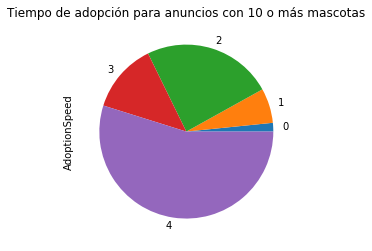

In [16]:
ax = train.loc[train.Quantity >= 10].AdoptionSpeed\
            .value_counts().sort_index()\
            .plot.pie()
ax.set_title('Tiempo de adopción para anuncios con 10 o más mascotas')

Existen casos en que se ofrecen demasiadas mascotas. Además se observa que a veces las cantidades
<br>en la descripción no encajan con las de la columna Quantity:

In [16]:
train.loc[[989,11673]][['Name', 'Description', 'Quantity', 'AdoptionSpeed']]

,Name,Description,Quantity,AdoptionSpeed
989,Cats From TTDI Now In Omiey's Home,"Hi feline lovers, There are 40 cats desperately seeking new homes before they are taken away from DBKL! This video link shows the lady who has been keeping these cats: Her neighbors seem to dislike cats, so they complained to DBKL. DBKL came to her house and told her to get rid of those cats. They'll be coming back to her house this Monday (6th February ) and she can only have 1 cat. DBKL will take the other cats and put them to sleep. She's looking for people who wants to adopt her cats and be their new owner. If you are interested, please contact Nicole at. Thank you.",20,2
11673,Snowy,Snowy is quiet and adorable. Likes to keep to herself most of the time because she is shy. She could be playful when she is in the mood to play with you.,10,4


En el primer caso, se ofrecen 40 gatos en la descripción, pero en la columna de cantidad figura la cantidad de 20.
<br>En el otro, se ofrece solo 1 en el texto, pero en la columna Quantity se indica 10.

Un punto importante es el hecho de que existe una cantidad importante de casos en<br>
que las mascotas logran ser adoptadas

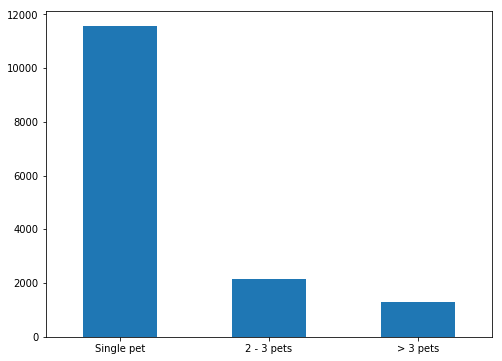

In [18]:
train['QuantityGroup'].value_counts().plot.bar(figsize=(8,6), rot=0)

In [19]:
qgruops = train[['QuantityGroup','AdoptionSpeed', 'PetID']].groupby(['QuantityGroup','AdoptionSpeed']).count() 
qgruops = qgruops.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
qgruops = qgruops.pivot_table(index= 'QuantityGroup',columns='AdoptionSpeed',values='PetID')
#qgruops.sort_index(ascending=False, inplace=True)
origindex = qgruops.index
qgruops = qgruops.reindex([origindex.tolist()[-1]] + origindex.tolist()[:2])
qgruops

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,331,2439,3163,2552,3080
2 - 3 pets,55,448,543,455,647
> 3 pets,24,203,331,252,470


In [20]:
q_percentages = (qgruops.T/qgruops.sum(axis=1)).T 
q_percentages

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,0.028621,0.210895,0.273498,0.220666,0.266321
2 - 3 pets,0.025605,0.208566,0.252793,0.211825,0.301210
> 3 pets,0.018750,0.158594,0.258594,0.196875,0.367188


<Figure size 432x288 with 0 Axes>

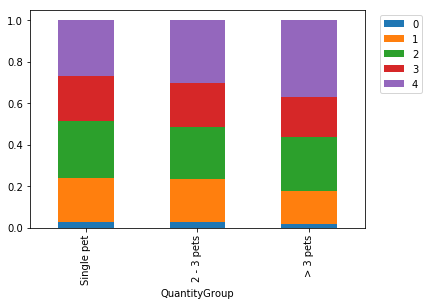

In [21]:
fig = plt.figure()
ax = q_percentages.plot.bar(stacked=True)
ax.legend(bbox_to_anchor = (1.03, 1.))

Se puede observar que los grupos de mascotas grandes tardan más en ser adoptados.
<br>Esto podría indicar que la velocidad de adopción guarda relación con el número de mascotas.


In [44]:
for i in range(15):
    if i % 5 == 0:
        print()
    print(q_percentages.values.flat[i], end=' ')
    


0.028620838737570254 0.21089494163424125 0.27349762213575446 0.22066580198875918 0.2663207955036749 
0.02461322081575246 0.2039381153305204 0.2545710267229255 0.2158931082981716 0.3009845288326301 
0.02193419740777667 0.17996011964107678 0.25523429710867396 0.19940179461615154 0.34346959122632104 

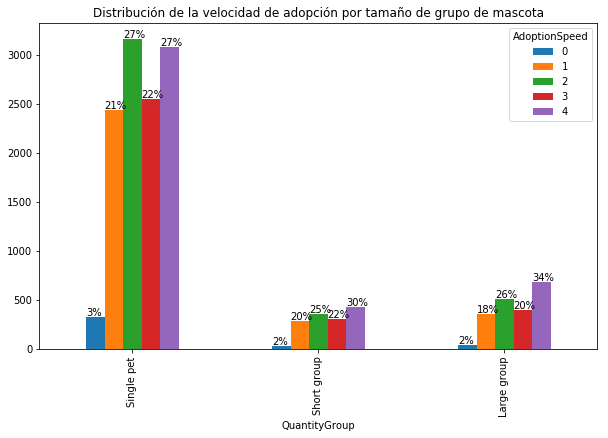

In [51]:
#deprecated
ax = qgruops.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por tamaño de grupo de mascota")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(q_percentages.values.flat[ix]), (x, y + height + 10))

Al parecer, el comportamiento de la velocidad de adopción se mantiene incluso para los anuncios
<br>más de una mascota. Esto significa que la velocidad de adopción es independiente del numero de mascotas.


<br><br>
### Fee

In [22]:
train.Fee.min(), train.Fee.max()

(0, 3000)

In [23]:
fee_data = train[['Fee', 'AdoptionSpeed', 'PetID']].copy()
fee_data.sample(10)

,Fee,AdoptionSpeed,PetID
10453,0,2,a12bb119e
13792,0,1,5112b0c92
6597,0,4,4f735cd71
10489,0,1,1baea0d16
10235,0,2,024bc29f1
3769,0,2,6366dd2f9
2014,0,2,ffebad2e7
8138,0,3,18286db6a
3355,0,4,4bcc7910d
13632,0,1,d3b4b6a8a


In [24]:
fee_data['Free'] = fee_data.Fee.apply(lambda f: "Free" if f == 0 else "Not Free")

Text(0.5, 1.0, 'Cantidad de anuncios de adopción con pago necesario')

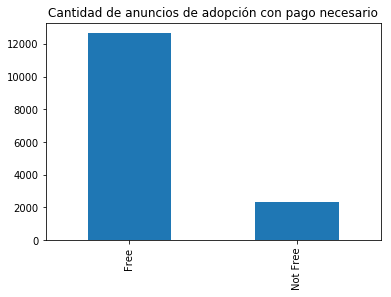

In [25]:
ax = fee_data['Free'].value_counts().plot.bar()
ax.set_title("Cantidad de anuncios de adopción con pago necesario")

In [26]:
def generate_fee_bins(fee):
    if fee == 0:
        return "0"
    elif fee < 25:
        return "[  1, 25)"
    elif fee < 60:
        return "[ 25, 59)"
    elif fee < 108:
        return "[ 59, 108)"
    elif fee < 210:
        return "[108, 210)"
    else:
        return "[210, 3000]"

In [27]:
fee_data['FeeBins'] = fee_data['Fee'].apply(generate_fee_bins)
fee_data

,Fee,AdoptionSpeed,PetID,Free,FeeBins
0,100,2,86e1089a3,Not Free,"[ 59, 108)"
1,0,3,3422e4906,Free,0
2,0,2,850a43f90,Free,0
3,0,2,d24c30b4b,Free,0
4,300,1,1caa6fcdb,Not Free,"[210, 3000]"
5,0,3,97aa9eeac,Free,0
6,0,1,c06d167ca,Free,0
7,0,4,7a0942d61,Free,0
8,50,1,8e76c8e39,Not Free,"[ 25, 59)"
9,0,2,aaedd873d,Free,0


In [28]:
fee_data['FeeBins'].value_counts().sort_index()

0              12663
[  1, 25)      346  
[ 25, 59)      610  
[ 59, 108)     514  
[108, 210)     437  
[210, 3000]    423  
Name: FeeBins, dtype: int64

Text(0.5, 1.0, 'Distribución de precios de mascotas')

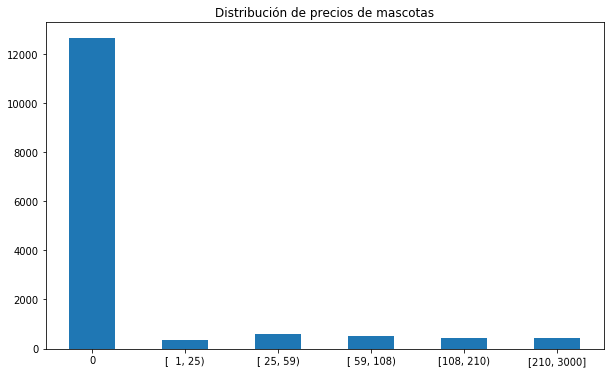

In [30]:
ax = fee_data['FeeBins'].value_counts().sort_index().plot.bar(rot=0.25, figsize=(10,6))
ax.set_title("Distribución de precios de mascotas")

In [31]:
feegroups = fee_data[['FeeBins','AdoptionSpeed', 'PetID']].groupby(['FeeBins','AdoptionSpeed']).count() 
feegroups = feegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
feegroups = feegroups.pivot_table(index= 'FeeBins',columns='AdoptionSpeed',values='PetID')
feegroups

AdoptionSpeed,0,1,2,3,4
FeeBins,,,,,
0,357,2611,3430,2789,3476
"[ 1, 25)",5,68,104,74,95
"[ 25, 59)",13,140,158,117,182
"[ 59, 108)",11,88,114,101,200
"[108, 210)",11,91,112,90,133
"[210, 3000]",13,92,119,88,111


In [32]:
feepercentages = (feegroups.T / feegroups.sum(axis=1)).T
feepercentages

AdoptionSpeed,0,1,2,3,4
FeeBins,,,,,
0,0.028192,0.206191,0.270868,0.220248,0.274501
"[ 1, 25)",0.014451,0.196532,0.300578,0.213873,0.274566
"[ 25, 59)",0.021311,0.229508,0.259016,0.191803,0.298361
"[ 59, 108)",0.021401,0.171206,0.221790,0.196498,0.389105
"[108, 210)",0.025172,0.208238,0.256293,0.205950,0.304348
"[210, 3000]",0.030733,0.217494,0.281324,0.208038,0.262411


Text(0.5, 1.0, 'Velocidad de adopción por precio')

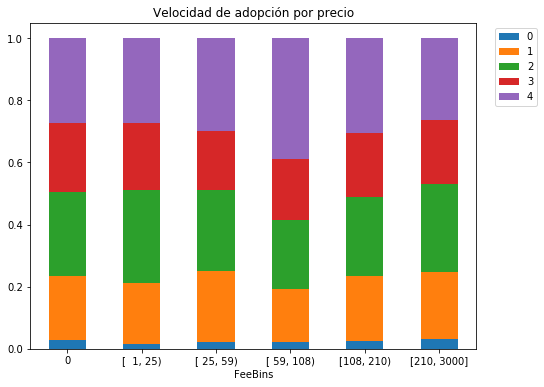

In [35]:
ax = feepercentages.plot.bar(stacked=True, figsize= (8,6), rot=0)
ax.legend(bbox_to_anchor = (1.03, 1.))
ax.set_title("Velocidad de adopción por precio")

Se puede observar que la distribución se mantiene, a excepción de los anuncios con montos intermedios
<br><br>

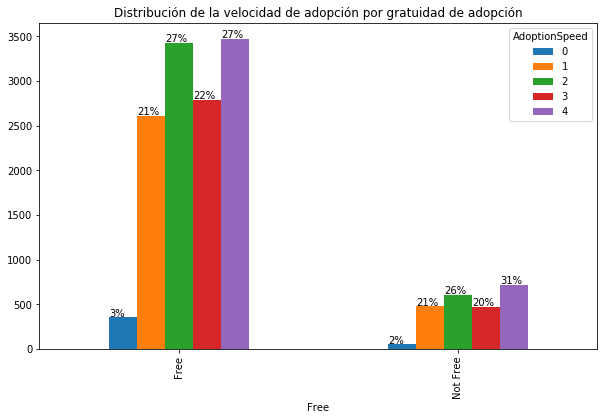

In [120]:
#deprecated
ax = feegroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por gratuidad de adopción")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(feepercentages.values.flat[ix]), (x, y + height + 10))

### State

In [36]:
state_counts = train.StateName.value_counts()
state_counts

Selangor           8714
Kuala Lumpur       3845
Pulau Pinang       843 
Johor              507 
Perak              420 
Negeri Sembilan    253 
Melaka             137 
Kedah              110 
Pahang             85  
Terengganu         26  
Sabah              22  
Kelantan           15  
Sarawak            13  
Labuan             3   
Name: StateName, dtype: int64

In [37]:
top7states = train.StateName.value_counts().index[:7]
top7states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Johor', 'Perak',
       'Negeri Sembilan', 'Melaka'],
      dtype='object')

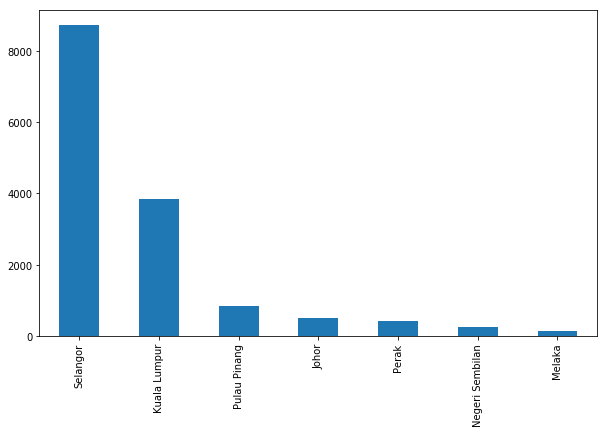

In [38]:
state_counts[:7].plot.bar(figsize=(10,6))

In [39]:
top5states = train.StateName.value_counts().index[:5]
top5states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Johor', 'Perak'], dtype='object')

In [40]:
#no se ve muy bonito. Los menores a Perak los catalogaremos como otros

In [41]:
state_data = train[['StateName', 'AdoptionSpeed']].copy()

In [42]:
state_data['StateNameSimple'] = state_data['StateName'].apply(lambda state:\
                                                               state if state in top7states\
                                                                     else "Others")

In [43]:
state_data['AdoptionSpeedSimple'] = state_data.AdoptionSpeed.apply(lambda speed:\
                                                                  "Adopted" if speed < 4\
                                                                  else "Not Adopted")

In [44]:
top3states = train.StateName.value_counts().index[:3]
top3states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang'], dtype='object')

In [45]:
stgroups = train.loc[train.StateName.isin(top7states)]
stgroups = stgroups[['StateName','AdoptionSpeed', 'PetID']].groupby(['StateName','AdoptionSpeed']).count() 
stgroups = stgroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stgroups = stgroups.pivot_table(index= 'StateName',columns='AdoptionSpeed',values='PetID')
stgroups = stgroups.reindex(top7states)
stgroups

AdoptionSpeed,0,1,2,3,4
Selangor,246,1877,2435,2004,2152
Kuala Lumpur,112,814,996,731,1192
Pulau Pinang,8,122,216,197,300
Johor,23,113,136,103,132
Perak,3,48,111,117,141
Negeri Sembilan,4,36,63,42,108
Melaka,4,18,23,12,80


In [46]:
stpercentages = (stgroups.T/stgroups.sum(axis=1)).T 
stpercentages

AdoptionSpeed,0,1,2,3,4
Selangor,0.028230,0.215401,0.279435,0.229975,0.246959
Kuala Lumpur,0.029129,0.211704,0.259038,0.190117,0.310013
Pulau Pinang,0.009490,0.144721,0.256228,0.233689,0.355872
Johor,0.045365,0.222880,0.268245,0.203156,0.260355
Perak,0.007143,0.114286,0.264286,0.278571,0.335714
Negeri Sembilan,0.015810,0.142292,0.249012,0.166008,0.426877
Melaka,0.029197,0.131387,0.167883,0.087591,0.583942


Text(0.5, 1.0, 'Velocidad de adopción por estado')

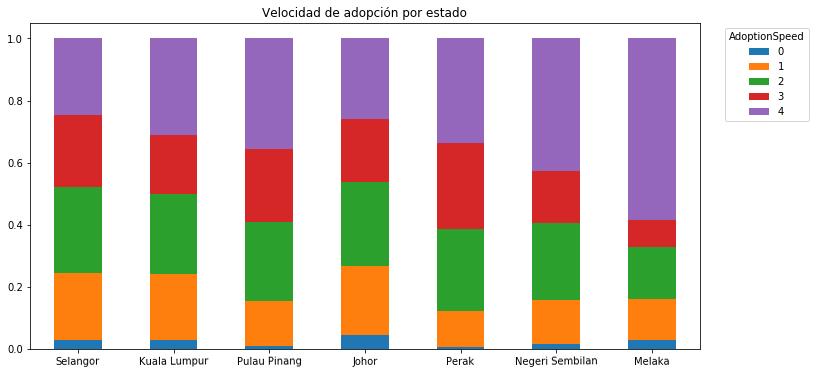

In [123]:
ax = stpercentages.plot.bar(stacked=True, figsize=(12,6), rot=0.5)
ax.legend(bbox_to_anchor = (1.03, 1.), title= "AdoptionSpeed")
ax.set_title("Velocidad de adopción por estado")

Existe una diferencia de velocidades de adopción en los distintos estados. Se puede observar que Selangor es el que tiene menor proporción de mascotas no adoptadas, y, junto a Johor, son las ciudades con adopciones más rápidas.

Esta variable podría adoptarse como posición geográfica, para que esté "a prueba de" creación de nuevos estados.

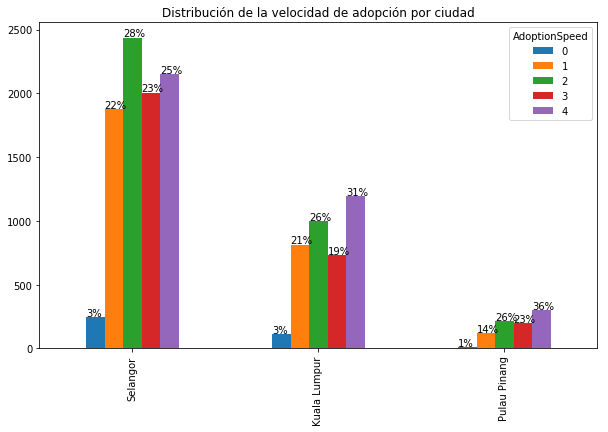

In [71]:
#deprecated
ax = stgroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por ciudad")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(stpercentages.values.flat[ix]), (x, y + height + 10))

In [90]:
stsimplegroups = state_data.loc[state_data.StateName.isin(top3states)]
stsimplegroups = stsimplegroups[['StateName','AdoptionSpeedSimple', 'StateNameSimple']].groupby(['StateName','AdoptionSpeedSimple']).count() 
stsimplegroups = stsimplegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stsimplegroups = stsimplegroups.pivot_table(index= 'StateName',columns='AdoptionSpeedSimple',values='StateNameSimple')
stsimplegroups = stsimplegroups.reindex(top3states)
stsimplegroups

AdoptionSpeedSimple,Adopted,Not Adopted
Selangor,6562,2152
Kuala Lumpur,2653,1192
Pulau Pinang,543,300


In [100]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [130]:
handles, labels = ax_selangor.get_legend_handles_labels()

([<matplotlib.patches.Wedge at 0x1ced2d30>,
 ['Adopted', 'Not Adopted'])

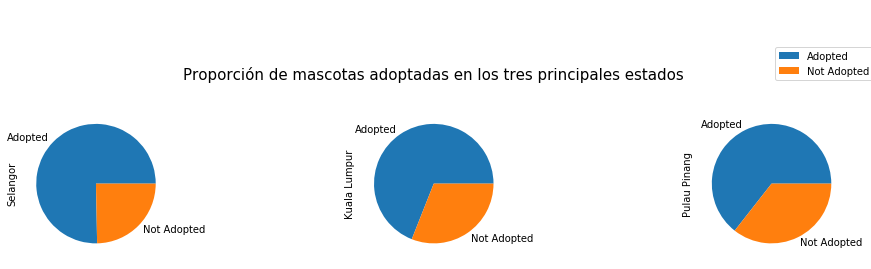

In [163]:
fig = plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
ax_selangor = stsimplegroups.T['Selangor'].plot.pie()

handles, labels = ax_selangor.get_legend_handles_labels()
fig.legend( handles, labels, loc = (0.89, 0.7))

plt.subplot(1,3,2)
plt.title("Proporción de mascotas adoptadas en los tres principales estados", {'fontsize': 15}, pad = 30)
ax_kuala_lumpur = stsimplegroups.T['Kuala Lumpur'].plot.pie()

plt.subplot(1,3,3)
ax_pulau = stsimplegroups.T['Pulau Pinang'].plot.pie()


plt.tight_layout()

En el segundo y tercer estado del ranking, se observa que la proporción de mascotas no adoptadas es mayor que en Selangor.

<br><br>
### Description

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [75]:
PUNCTUATION = set(string.punctuation)

In [71]:
STOPWORDS = set(stopwords.words('english'))

In [98]:
def count_no_stopwords(s,stopwords=STOPWORDS):
    tokens = word_tokenize(s.lower())
    filtered = [tok for tok in tokens \
                        if    (tok not in stopwords) \
                          and (tok not in PUNCTUATION) ]
    return len(filtered)

In [ ]:
try:
    train = pd.read_excel("train_with_wordcount.xlsx")
except:
    train['WordCount'] = train.Description.fillna('').apply(count_no_stopwords)
    train.to_excel("train_with_wordcount.xlsx",engine="xlsxwriter")

Text(0.5, 1.0, 'Distribución de tamaño de descripción')

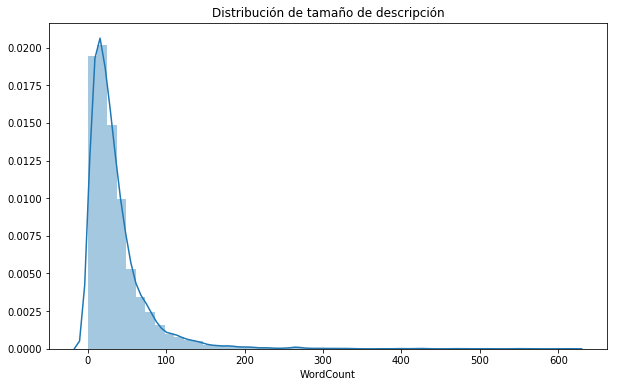

In [121]:
plt.figure(figsize=(10,6))
ax = sns.distplot(train['WordCount'])
ax.set_title("Distribución de tamaño de descripción")

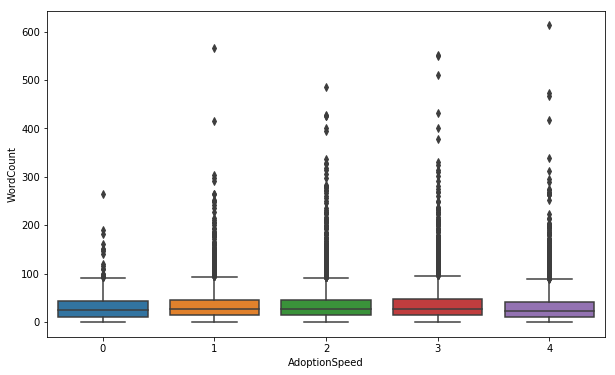

In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AdoptionSpeed",y="WordCount",data=train, showfliers=True)

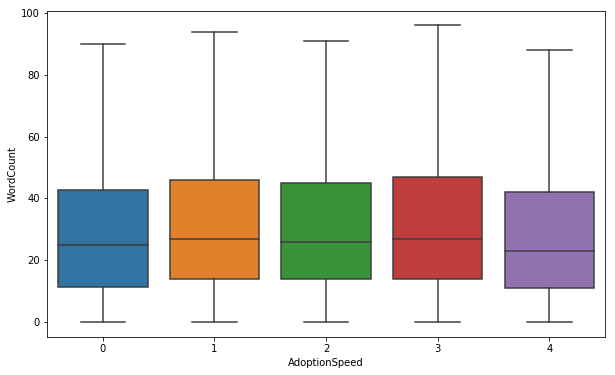

In [127]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AdoptionSpeed",y="WordCount",data=train, showfliers=False)

Sin considerar los valores atípicos, no es notable hallar alguna relación entre la cantidad de palabras y la velocidad de adopción.
<br>En cambio, considerando los outliers se puede observar que las mascotas con mayor velocidad de adopción presentan menos outliers los cuales son descripciones más cortas en comparación con los otros.

### Análisis de sentimiento



From Google Cloud:

    *score* of the sentiment ranges between -1.0 (negative) and 1.0 (positive) and corresponds to the overall emotional leaning of the text.<br>
    *magnitude* indicates the overall strength of emotion (both positive and negative) within the given text, between 0.0 and +inf. Unlike score, magnitude is not normalized; each expression of emotion within the text (both positive and negative) contributes to the text's magnitude (so longer text blocks may have greater magnitudes).



In [101]:
import os
import json

In [55]:
base_rel_path = 'data/train_sentiment'
text_metadata = []
for fname in os.listdir(base_rel_path):
    with open(base_rel_path+'/'+fname, encoding='utf8') as f:
        metadata = json.load(f)
        #relevant_data = {
        #   "PetID":fname.replace(".json",''),
        #    'language': metadata['language'],
        #    'documentSentiment': metadata['documentSentiment'],
        #    'sentences': metadata['sentences']
        #}
        del metadata['categories']
        del metadata['entities']
        del metadata['tokens']
        metadata['sentimentMagnitude'] = metadata['documentSentiment']['magnitude']
        metadata['sentimentScore'] = metadata['documentSentiment']['score']
        del metadata['documentSentiment']
        text_metadata.append(dict(metadata, **{"PetID":fname.replace(".json",'')}))#['labelAnnotations'

In [102]:
text_metadata[:1]

[{'sentences': [{'text': {'content': 'Ollie was rescued from the construction site behind my house.',
     'beginOffset': -1},
    'sentiment': {'magnitude': 0, 'score': 0}},
   {'text': {'content': 'He is quite the manja type and loves to play.',
     'beginOffset': -1},
    'sentiment': {'magnitude': 0.9, 'score': 0.9}},
   {'text': {'content': 'He makes a good companion and playmate for young children.',
     'beginOffset': -1},
    'sentiment': {'magnitude': 0.9, 'score': 0.9}},
   {'text': {'content': 'He is quite the handsome chap with a distinct mark on his face like a beauty mark.',
     'beginOffset': -1},
    'sentiment': {'magnitude': 0.8, 'score': 0.8}}],
  'language': 'en',
  'sentimentMagnitude': 2.8,
  'sentimentScore': 0.7,
  'PetID': '0008c5398'}]

In [57]:
train_metadata = pd.DataFrame(text_metadata)
train_metadata

PetID language  \
0      0008c5398  en        
1      000a290e4  en        
2      000fb9572  en        
3      0011d7c25  en        
4      00156db4a  en        
5      001a1aaad  en        
6      001b1507c  en        
7      002230dea  en        
8      002278114  en        
9      0038234c6  en        
10     0038c9343  en        
11     003dd2e26  en        
12     0045ed62a  en        
13     004709939  en        
14     004a26127  en        
15     004c2f355  en        
16     0052dcf47  en        
17     00553ae55  en        
18     0058586f1  en        
19     005afe792  en        
20     005bb92d8  en        
21     0063bd7e0  en        
22     0063f83c9  en        
23     00648f96f  en        
24     006610fe3  en        
25     006d301e9  en        
26     006ffebaf  en        
27     00709d75b  en        
28     0073c33d0  en        
29     007bc1db4  en        
...          ...  ..        
14412  ff8e4c708  en        
14413  ff8e7c016  en        
14414  ff96988fc  en        
14415  ff9ce365b  en        
14416  ff9d8cb25  en        
14417  ff9f62e79  en        
14418  ffa5c6c35  en        
14419  ffaa73202  en        
14420  ffab93d18  en        
14421  ffb315803  en        
14422  ffb33c204  en        
14423  ffb3a78e1  en        
14424  ffb6a7f5d  en        
14425  ffbc3eaaf  en        
14426  ffd2e82a9  en        
14427  ffd506899  en        
14428  ffd61a488  en        
14429  ffd697903  en        
14430  ffdad97e5  en        
14431  ffe0f06ab  en        
14432  ffe2090b3  en        
14433  ffe5a0271  en        
14434  ffe7f0b70  en        
14435  ffebad2e7  en        
14436  ffef9a2af  en        
14437  fff24fcb5  en        
14438  fff4a6420  en        
14439  fff6f2f61  en        
14440  fffd78a11  en        
14441  fffd9b5a8  en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [134]:
pd.DataFrame(train_metadata.language.value_counts())

,language
en,14309
zh,95
zh-Hant,36
de,2


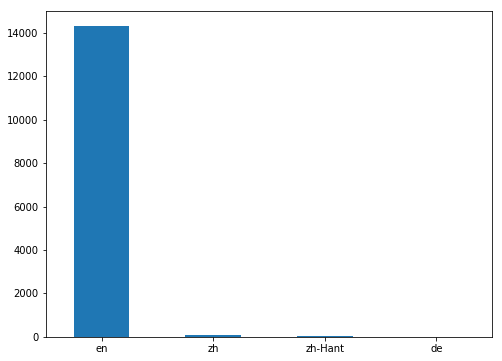

In [132]:
train_metadata.language.value_counts().plot.bar(figsize=(8,6),rot=0)

In [104]:
train_metadata.loc[train_metadata.language.isin([ 'de'])]

,PetID,language,sentences,sentimentMagnitude,sentimentScore
5450,61f0927c3,de,"[{'text': {'content': 'Kiki Sgt manja dan aktiv.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': 0.3}}]",0.3,0.3
6006,6c34a5944,de,"[{'text': {'content': 'meowww...meow...meeeeoooOOOwww!', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}, {'text': {'content': 'repeat.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'YES im talkative! =)', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.6, 'score': 0.6}}]",0.9,0.3


In [106]:
train.shape, train_metadata.shape

((14993, 27), (14442, 5))

In [137]:
train_metadata_en = train_metadata[train_metadata['language'] == 'en']

In [138]:
train_sentiment = pd.merge(train, train_metadata_en)
train_sentiment

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,PhotoAmt,AdoptionSpeed,StateName,QuantityGroup,WordCount,language,sentences,sentimentMagnitude,sentimentScore
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,1.0,2,Selangor,Single pet,36,en,"[{'text': {'content': 'Nibble is a 3+ month old ball of cuteness.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.8, 'score': 0.8}}, {'text': {'content': 'He is energetic and playful.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.8, 'score': 0.8}}, {'text': {'content': 'I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.2, 'score': -0.2}}, {'text': {'content': 'The result was this little kitty.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'I do not have enough space and funds to care for more cats in my household.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}, {'text': {'content': 'Looking for responsible people to take over Nibble's care.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': 0.3}}]",2.4,0.3
1,1,Brisco,1,307,0,1,2,7,0,2,...,3422e4906,7.0,3,Selangor,Single pet,38,en,"[{'text': {'content': 'Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': -0.9}}, {'text': {'content': 'Gave birth to them at the roadside.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'They are all healthy and adorable puppies.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': 0.9}}, {'text': {'content': 'Already dewormed, vaccinated and ready to go to a home.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.2, 'score': 0.2}}, {'text': {'content': 'No tying or caging for long hours as guard dogs.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': -0.1}}, {'text': {'content': 'However, it is acceptable to cage or tie for precautionary purposes.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.6, 'score': 0.6}}, {'text': {'content': 'Interested to adopt pls call me.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.7, 'score': 0.7}}]",3.7,0.2
2,1,Hunter,1,307,0,1,1,0,0,2,...,850a43f90,3.0,2,Selangor,Single pet,37,en,"[{'text': {'content': 'This handsome yet cute boy is up for adoption.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.7, 'score': 0.7}}, {'text': {'content': 'He is the most playful pal we've seen in our puppies.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.7, 'score': 0.7}}, {'text': {'content': 'He loves to nibble on shoelaces , Chase you at such a young age.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.6, 'score': 0.6}}, {'text': {'content': 'Imagine what a cute brat he will be when he grows.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.7, 'score': 0.7}}, {'text': {'content': 'We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.8, 'score': 0.8}}, {'text': {'content': 'Please call urgently if you would like to adopt this cutie.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}]",3.7,0.6
3,2,NaN,3,266,0,2,5,6,0,2,...,d24c30b4b,2.0,2,Selangor,Single pet,6,en,"[{'text': {'content': 'This is a stray kitten that came to my house.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'Have been feeding it, but cannot keep it.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.2, 'score': -0.2}}]",0.2,0.0
4,2,BULAT,12,264,264,1,1,0,0,2,...,1caa6fcdb,3.0,1,Selangor,Single pet,39,en,"[{'text': {'content': 'anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.5, 'score': 0.5}}, {'tex

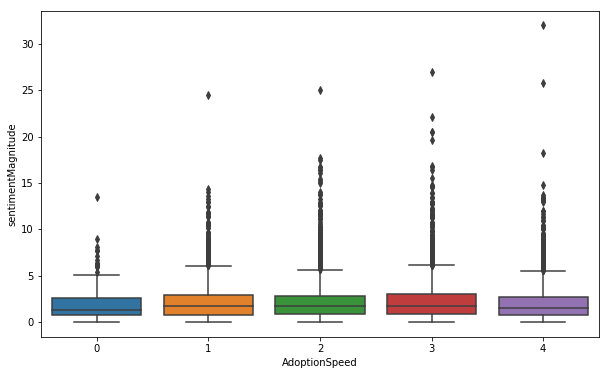

In [139]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AdoptionSpeed",y="sentimentMagnitude",data=train_sentiment)#, showfliers=False)

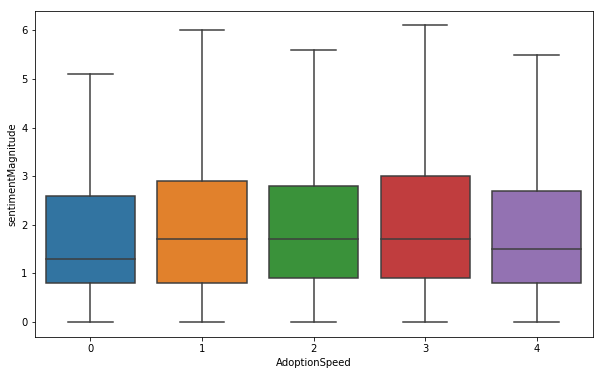

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AdoptionSpeed",y="sentimentMagnitude",data=train_sentiment, showfliers=False)

Se puede observar que las mascotas con mayor velocidad de adopción tienden a presentar menor magnitud en la redacción en comparación con los otros (a excepción de las no adoptadas).

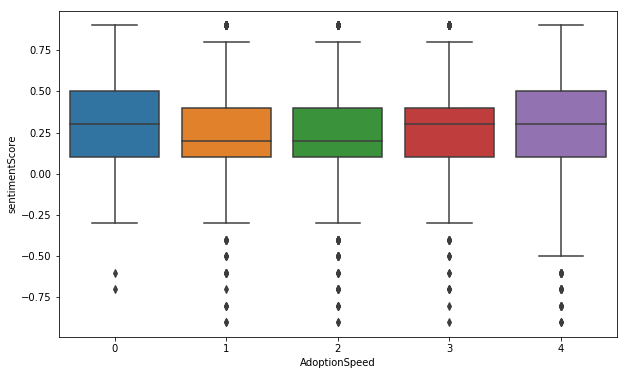

In [143]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AdoptionSpeed",y="sentimentScore",data=train_sentiment)#, showfliers=False)

Se observa que para los anuncios con velocidades lentas de adopcion, el puntaje de sentimiento tiende a ser menor que para los anuncios con adopciones rápidas o sin adopciones.